In [ ]:
import pandas as pd

file_path = 'train.csv'

df = pd.read_csv(file_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
...,...,...,...,...,...,...,...,...,...
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-..."
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[..."
1710667,1388745716620000264,C,NaN,NaN,20000264,1388745716,A,False,[]
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-..."


### 1. Time distribution problem 

In [2]:
# def calculate_time(polyline):
#     total_time_minutes = 15 * (len(polyline) - 1)  / 60
#     return total_time_minutes 

# df['Trip_duration_mins'] = df['POLYLINE_Parsed'].apply(calculate_time)

### I really don't feel like parsing the polylines again, so we're gonna get a little cocky here.

In [3]:
polylineString = df.iloc[0]['POLYLINE']
polylineString.count('[')

24

In [14]:
def calculate_time(polyline):
    return (15 * (polyline.count('[') - 2)) / 60

df['Trip_duration_mins'] = df['POLYLINE'].apply(calculate_time)

### Visualize before cleaning

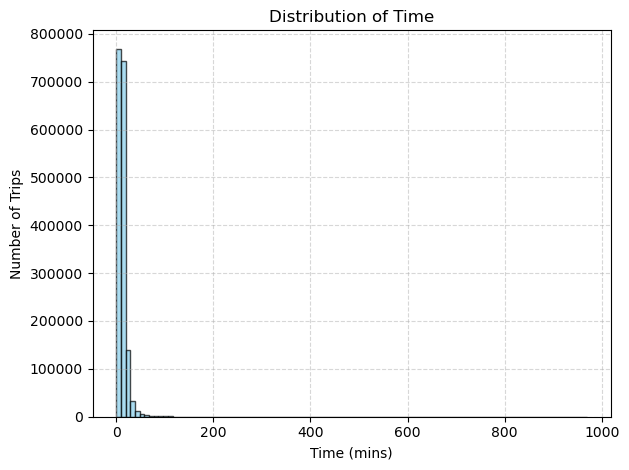

In [15]:
import matplotlib.pyplot as plt
def histogram(values,title,xLabel,yLabel):
    plt.hist(values, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {title}')
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    return plt.show()
histogram(df['Trip_duration_mins'],'Time','Time (mins)','Number of Trips')

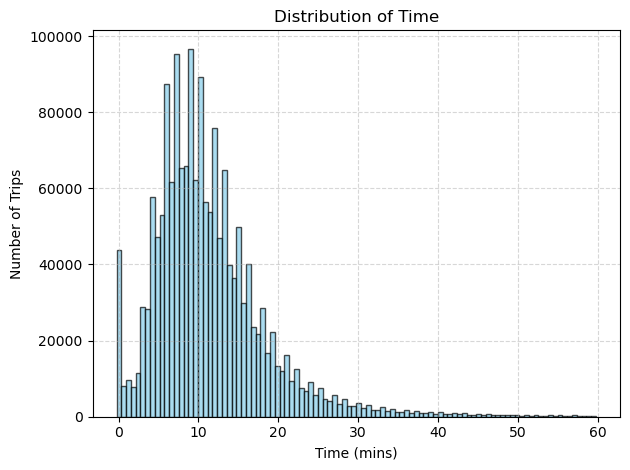

In [20]:
tf = df[df['Trip_duration_mins'] < 60] 
histogram(tf['Trip_duration_mins'],'Time','Time (mins)','Number of Trips')

### Check the effect of IQR method

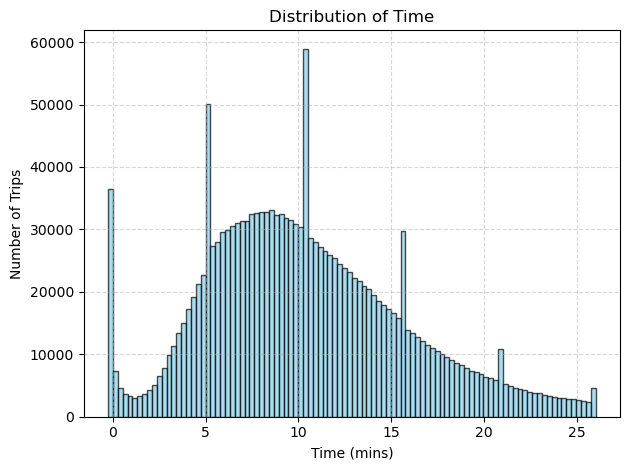

In [11]:
Q1 = df['Trip_duration_mins'].quantile(0.25)
Q3 = df['Trip_duration_mins'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


itf = df[(df['Trip_duration_mins'] >= lower_bound) & (df['Trip_duration_mins'] <= upper_bound) ]

histogram(itf['Trip_duration_mins'],'Time','Time (mins)','Number of Trips')



**I'm really done with normal distribution!**  
<br>
<div style="display: flex; justify-content: center; align-items: center;">
  <img src="sometimesyouhavetigiveupon.jpg" style="width: 95%;" />
</div>



***No but seriously tho after looking at the data and try retesting everything i got to a concolusion that the distribution is not only affected by removing outliers of time, but also the distance and the speed... etc therfore this problem can't be determined or it might not be a problem at all***

`Now with the other problem`  
### 2. IQR method removes valid trips

In [21]:
df['Trip_duration_mins'].describe()

count    1.710670e+06
mean     1.193958e+01
std      1.141343e+01
min     -2.500000e-01
25%      6.750000e+00
50%      1.000000e+01
75%      1.450000e+01
max      9.700000e+02
Name: Trip_duration_mins, dtype: float64

**Create a binned histogram**

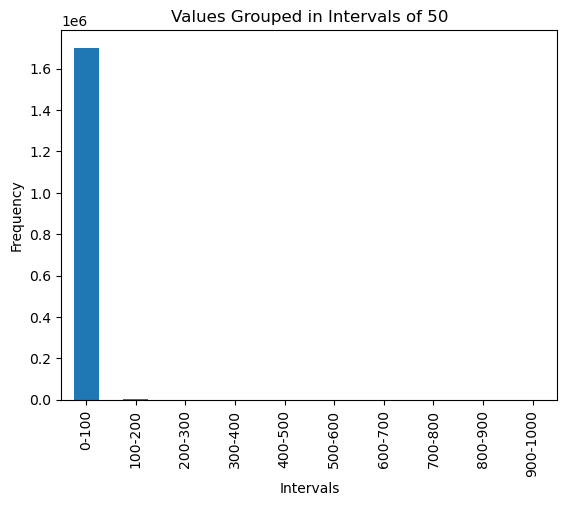

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [x for x in range(0,1001,100) ]

labels = [f'{i}-{i+100}' for i in bins[:-1]]

categories = pd.cut(df['Trip_duration_mins'], bins=bins, labels=labels, right=False)

counts = categories.value_counts().sort_index()

counts.plot(kind='bar')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.title('Values Grouped in Intervals of 50')
plt.show()


Visualization is hard becausee most of the data is in the first interval

*Check them manually*

In [27]:
counts

Trip_duration_mins
0-100       1701332
100-200        2795
200-300         434
300-400         106
400-500          57
500-600          26
600-700          12
700-800           2
800-900           2
900-1000          3
Name: count, dtype: int64

#### investigate trips that aree 100 to 200 mins long and descide if we should keep them

In [ ]:
import ast
parsePolyLine = lambda x: [[coord[1], coord[0]] for coord in ast.literal_eval(x)]
tripsLtTH = df[(df['Trip_duration_mins'] > 200) & (df['Trip_duration_mins'] < 300)]

import folium
def MapPlot(polyline_points):
    # polyline_points = [[lat, lon] for lon, lat in points]
    length = len(polyline_points)


        
    # Center map on Porto
    m = folium.Map(location=[sum(x[0] for x in polyline_points)/length, sum(x[1] for x in polyline_points)/length], zoom_start=14)


    for lat, lon in polyline_points:
        folium.Marker([lat, lon]).add_to(m)

    folium.PolyLine(polyline_points, color="blue", weight=2.5, opacity=1).add_to(m)

    folium.Marker([polyline_points[0][0], polyline_points[0][1]], popup="Start", icon=folium.Icon(color="green")).add_to(m)
    folium.Marker([polyline_points[-1][0], polyline_points[-1][1]], popup="End", icon=folium.Icon(color="red")).add_to(m)
    return m  

MapPlot(parsePolyLine(tripsLtTH.iloc[2]['POLYLINE']))


***As observed they are not worth keeping***

#### Checking trips between 70 and 100

In [42]:
tripsLtoH = df[(df['Trip_duration_mins'] > 70) & (df['Trip_duration_mins'] < 100)]
MapPlot(parsePolyLine(tripsLtoH.iloc[1]['POLYLINE']))


***Almost all of them are corrupted therfore using the IQR method wasn't a bad idea after all***  

**IT is worth noting that we might have lost some real trips in the middle but it is not worth risking with the corrupted data**

![Let's gooo](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExb2NyYnN1eDh6enh3dDEzanRjdGZuc3hhcncxNXk1dHZjbDM1OG55bSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/Ru9sjtZ09XOEg/giphy.gif)  
# <span style='color:green'>peaace out!</span>